In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("housing_data.csv")


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Observation of our data 
##Is there any missing data, and the format of the data

In [4]:
df.info() 
#datas are in good format and there are no any n/a values
#Understand what all features mean -- gain domain knowledge
#Check the hypothesis on which variables are importance and if they are not already in the data, is it possible to get the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
##Mean values, std deviation of each variables
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
##See value counts of categorical data
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
##Visualise how datas are distributed using histogram
##get information on how data is distributed
# df.hist( bins=50, figsize=(20,15))


## Train-test split randomly by writing your own function

In [8]:
##Write a function that can return training and testing set where data is allocated randomly to training and testing set with
##parameters given as data and test_ration
##Use permutation to get the randomised selection of indicies, calculate the test length from test_ratio
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42) #setting the starting state of the random number generation
    #so that experiment can be run again and same output can be produced
    random_order_of_indicies = np.random.permutation(len(data))
    #generate numbers from 0 to len(data) into an array and shuffle them
    #so that random indices of data can be used for testing and training
    #each indices denotes each row
    test_set_size = int(test_ratio*len(data))
    #calculate length of test size by test ratio
    training_indicies = random_order_of_indicies[test_set_size:]
    #selecting training indices
    testing_indicies = random_order_of_indicies[:test_set_size]
    #selecting testing indicies
    return data.iloc[training_indicies], data.iloc[testing_indicies] 
    #return training and testing rows with selected trainind and testing indicies
    
train_df, test_df = split_train_test(df, 0.2)

# Train test split using scikit learn function

In [9]:
##train-test split using scikit-learn
##split the data into train and test set by given test_size as an argument
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df['CHAS'], random_state=42)


In [10]:
'CHAS'  in list(df.columns)

True

In [11]:
#Stratified-shuffle-split

from sklearn.model_selection import StratifiedShuffleSplit
stratifiel_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in stratifiel_split.split(df, df["CHAS"]):
    print("TRAIN:", train_index, "TEST:", test_index)
    strat_train_set = df.loc[train_index]
    strat_test_Set = df.loc[test_index]
    
    


TRAIN: [254 348 476 321 326 411 250 100 429  57 413 115 490 199 494 142 113 468
 400 247 151 408  68 365  81  93 456 116  27 234 140  47 382 377 366 185
  73 267 231 118  96  40 182 417 492 373 294 482  62 414 289  72 314  89
 129 157 110 343 200 310 462 361  95  37 145 227 166  23  85 281 285 264
 501 440 241 473   0 488 452 323 252 416 119  60 251 409 191  42 188 412
  92 353 292 107  12   3 364 339 301 467 376 280 309 202  61  24 122 164
 278 139  10 415 390 338 445 486 156 179 159  22 318 404 425  45  74 147
 431 215 434  44  83 144 500 406 161 331 243 293  86 162 458 359 295 124
 341 244 319 337  15 384 248 441 258  31 481 450 316  66  56 211 184 325
  41  11 262 491 177 369 249 238 125   5 224 235 334 165 475  63 437 497
 226  25  78 178 214 222 410 220  94 344  51 187 132  70 127 402  64 229
 306 298 432 163 117 327 175 442 141 111 120 427 503   8 311 282  75 276
 149 349 454 444 313 131 312   9 112 393 436   6 317  59 453 287  65 154
 308 189  35 392  33 484 447 403 299 499 270

In [12]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [13]:
x_train=strat_train_set[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS ', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [14]:
y_train = strat_train_set['MEDV']

In [15]:
x_test = strat_test_Set[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS ', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y_test = strat_test_Set['MEDV']

# Looking for correlations

In [16]:
df_corr=df.corr(method='pearson')

In [17]:
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [18]:
df_corr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [19]:
from pandas.plotting import scatter_matrix
cols= ['MEDV', 'RM', 'LSTAT', 'PTRATIO', 'INDUS']
scatter_matrix(df[cols], figsize=(20,9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B25800EB8>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B1CF57EB8>,
      dtype=object)

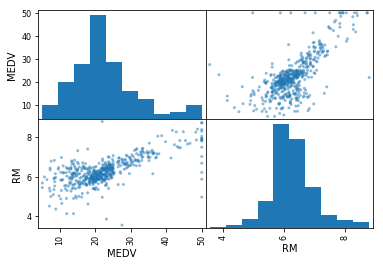

In [20]:
scatter_matrix(df[['MEDV', 'RM']])

Text(0, 0.5, 'MEDV')

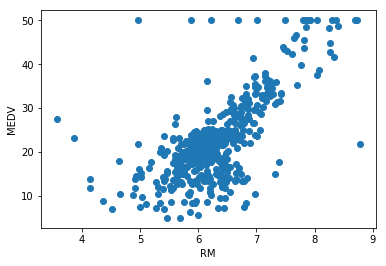

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df['RM'],df['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')

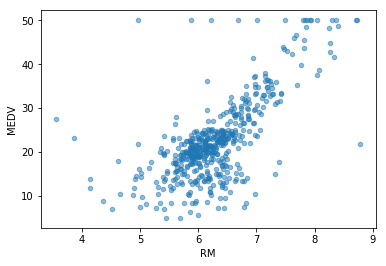

In [22]:
df.plot(kind='scatter', x="RM", y="MEDV", alpha =0.5)

In [23]:
#One of the idea of new feature is by combing two or more features #feature combination

# Dealing with missing values in our data

In our data there is no missing values. But this will not always be the case. And there are three options while dealing with missing attributes.
1. Get rid of missing data points
2. get rid of whole attributes
3. set the missing values to some value(0, mean, median, mode etc)
(to decide if the attribute is important find the correlation to target attribute, and if the correlation is close to 0 then delete the attribute)

1. df.dropna() ##delete rows with na
2. df.drop('colname', axis=1) ##delete column
3.df[col_name].fillna(value) ###compute values first i.e. median 

### Missing data using scikit learn
Using SimpleImputer

# Pipeline
After exploring your data when you are ready to build the model, you put every manipulation that you did to your data in a pipeline so that same manipulation can be repeated for the test data easily.
using sklearn.pipleline import Pipeline



In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
my_pipeline = Pipeline([('std_scaler', MinMaxScaler())])
X_train = my_pipeline.fit_transform(x_train)

X_test = my_pipeline.fit_transform(x_test)

In [25]:
X_train.shape

(404, 13)

In [26]:
X_train

array([[5.69444637e-04, 8.00000000e-01, 1.07407407e-01, ...,
        3.77777778e-01, 9.89888547e-01, 1.37304965e-01],
       [1.18186623e-04, 8.00000000e-01, 4.70370370e-02, ...,
        4.44444444e-01, 9.84971506e-01, 1.20851064e-01],
       [6.61666924e-02, 0.00000000e+00, 6.42962963e-01, ...,
        8.00000000e-01, 9.98260124e-01, 4.80851064e-01],
       ...,
       [1.02750280e-03, 0.00000000e+00, 7.96296296e-02, ...,
        5.55555556e-01, 9.91502345e-01, 5.21985816e-02],
       [6.45477124e-02, 0.00000000e+00, 6.42962963e-01, ...,
        8.00000000e-01, 1.27590902e-01, 4.65248227e-01],
       [5.34219855e-04, 0.00000000e+00, 4.87037037e-01, ...,
        3.77777778e-01, 9.89661607e-01, 3.34184397e-01]])

# Selecting Model

In [27]:
#import all required classifiers from sci-kit learn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
#importing dependencies to calculate confusion matrix, f1-score and cross validation score
from time import time 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


def train_predict(clf, x_train, y_train, x_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Print the name of the classifier and size of training set
    print ("Classifier: {} \nSize of training set:{}".format(clf.__class__.__name__, len(x_train)))
    
    # Training the classifier
    start_time = time()
    clf.fit(x_train, y_train)
    end_time = time()
    print ("Training time: {:.4f} seconds".format(end_time - start_time))
    
    
       
    # Print the results of prediction for training set
    start_time = time()
    y_train_pred=clf.predict(x_train)
    end_time = time()
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    print(f'RMSE of train set {rmse_train}')
    print ("Made predictions in {:.4f} seconds.".format(end_time - start_time))
    #test-set prediction
    start_time = time()
    y_pred=clf.predict (x_test)
    end_time = time()
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f'RMSE of test set {rmse}')
    print ("Made predictions in {:.4f} seconds.".format(end_time - start_time))
    
    #applying k-fold cross validation method where k is set to 10
    validation_accuracy=cross_val_score(estimator=clf,X=x_train, y=y_train, cv=10)
    print('10-fold validation scores:')
    print ('  Average accuracy: {}'.format(validation_accuracy.mean()))
    print('  Variance :{}'.format(((validation_accuracy.std())**2)))
    print('\n')

In [29]:
from sklearn import linear_model
from sklearn.linear_model import BayesianRidge, LogisticRegression
#Initialising the classifiers
c_1=LinearRegression()
c_2=linear_model.Lasso(alpha=0.1)
c_3=BayesianRidge()
c_4=AdaBoostClassifier(random_state=123)
c_5=BernoulliNB()
c_6=RandomForestClassifier()
c_7=KNeighborsClassifier()
c_8=DecisionTreeClassifier()



In [30]:
#Make a list of all the classifiers
register_classifier=[c_1,c_2,c_3,]
for i in register_classifier:
    train_predict(i,X_train,y_train,X_test,y_test)

Classifier: LinearRegression 
Size of training set:404
Training time: 0.0020 seconds
RMSE of train set 4.829321492635759
Made predictions in 0.0000 seconds.
RMSE of test set 4.283692345093736
Made predictions in 0.0000 seconds.
10-fold validation scores:
  Average accuracy: 0.6876630729268989
  Variance :0.005631419882703122


Classifier: Lasso 
Size of training set:404
Training time: 0.0020 seconds
RMSE of train set 5.182564576161431
Made predictions in 0.0000 seconds.
RMSE of test set 4.522800246718412
Made predictions in 0.0000 seconds.
10-fold validation scores:
  Average accuracy: 0.6581703914957576
  Variance :0.007661734668734451


Classifier: BayesianRidge 
Size of training set:404
Training time: 0.0020 seconds
RMSE of train set 4.8315776401395985
Made predictions in 0.0010 seconds.
RMSE of test set 4.262724103033083
Made predictions in 0.0000 seconds.
10-fold validation scores:
  Average accuracy: 0.6901411259733877
  Variance :0.005608111960572861




### Based on training and testing accuracy and 10 fold validation scores BayesianRidge is performing better. So we choose this algorithm for our final prediction


In [31]:
model = BayesianRidge()
model.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [32]:
y_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print(f'RMSE of test set {rmse}')

RMSE of test set 4.262724103033083


In [33]:
y_predict

array([21.20217185, 16.64324761, 28.76018132, 29.36901177,  6.90439067,
       12.20252234, 15.26314145, 16.91002849, 30.7960473 , 35.21067302,
       15.0962226 , -0.74992981, 22.09401694, 19.39091897, 18.35647365,
       11.931299  , 29.54869809, 12.26008574, 23.61595465, 22.92818006,
       19.60393341, 15.96330683, 18.67090049, 24.08801506, 18.4899122 ,
       31.47206832, 18.72119777, 32.37941295,  7.13103306, 33.03475584,
       17.43609422, 20.05131224, 28.08653178, 15.95658125, 25.75190417,
       17.4723162 , 36.6246587 , 22.76174418, 20.52149047, 35.72480935,
       23.74176534, 33.76741787, 22.66623846, 21.93442916, 17.42826823,
       31.17032756, 37.84675596, 19.80122302, 16.29497035, 14.00660696,
       20.12093534, 11.014721  , 17.73099686, 19.71743345, 26.08745505,
       32.00733538, 39.8219751 , 29.62702738, 13.25005948, 18.26191957,
       39.33014928, 17.51588423, 13.09327856, 26.33535542, 18.55601472,
       31.62380751, 21.93183447, 19.09042292, 20.27638555, 32.55

# Saving the model

In [34]:
from joblib import dump,load
dump(model, 'housePrice.joblib')

['housePrice.joblib']

### Doing Predictions using the saved model

In [35]:
from joblib import dump,load
model=load( 'housePrice.joblib')

In [36]:
#Here X_test represent the new data the model has not seen
model.predict(X_test[:3])

array([21.20217185, 16.64324761, 28.76018132])